<a href="https://colab.research.google.com/github/paradox20029/2.2c_314/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: !unzip "drive/MyDrive/Dog-visiArchive:  drive/MyDrive/Dog-vision/dog-breed-identification.zip   End-of-central-directory signature not found.  Either this file is not   a zipfile, or it constitutes one disk of a multi-part archive.  In the   latter case the central directory and zipfile comment will be found on   the last disk(s) of this archive. unzip:  cannot find zipfile directory in one of drive/MyDrive/Dog-vision/dog-breed-identification.zip or         drive/MyDrive/Dog-vision/dog-breed-identification.zip.zip, and cannot find drive/MyDrive/Dog-vision/dog-breed-identification.zip.ZIP, period.on/dog-breed-identification.zip" -d "drive/MyDrive/Dog-vision/"

!unzip "/content/drive/MyDrive/Dog-vision/dog-breed-identification (1).zip" -d "drive/MyDrive/Dog-vision/"


Archive:  /content/drive/MyDrive/Dog-vision/dog-breed-identification (1).zip
replace drive/MyDrive/Dog-vision/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

END TO END multi class dog breed classfication

 -PROBLEM
 to know the breed of the dog from the photo itself

 -DATA
 kaggle data identification competetion
 https://www.kaggle.com/competitions/dog-breed-identification/data

 -EVALUATION
 evaluation is file with prediction probabilities for each dog breed of each test image
 -FEATURES
this deals with unstructured data and their will be the usage of the deep learning models
there are 120 breeds of dogs
in the training set there are 10,000 images and labeled
in the testing set there are 10,000 images in the test set with no labels



In [3]:
#import tensor flow in google colab
import tensorflow as tf
print("the tf version",tf.__version__)

the tf version 2.15.0


In [4]:
import tensorflow_hub as hub
print("hub version:",hub.__version__)

hub version: 0.15.0


In [5]:
print("GPU is there" if (tf.config.list_physical_devices) else "not there")

GPU is there


In [6]:
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

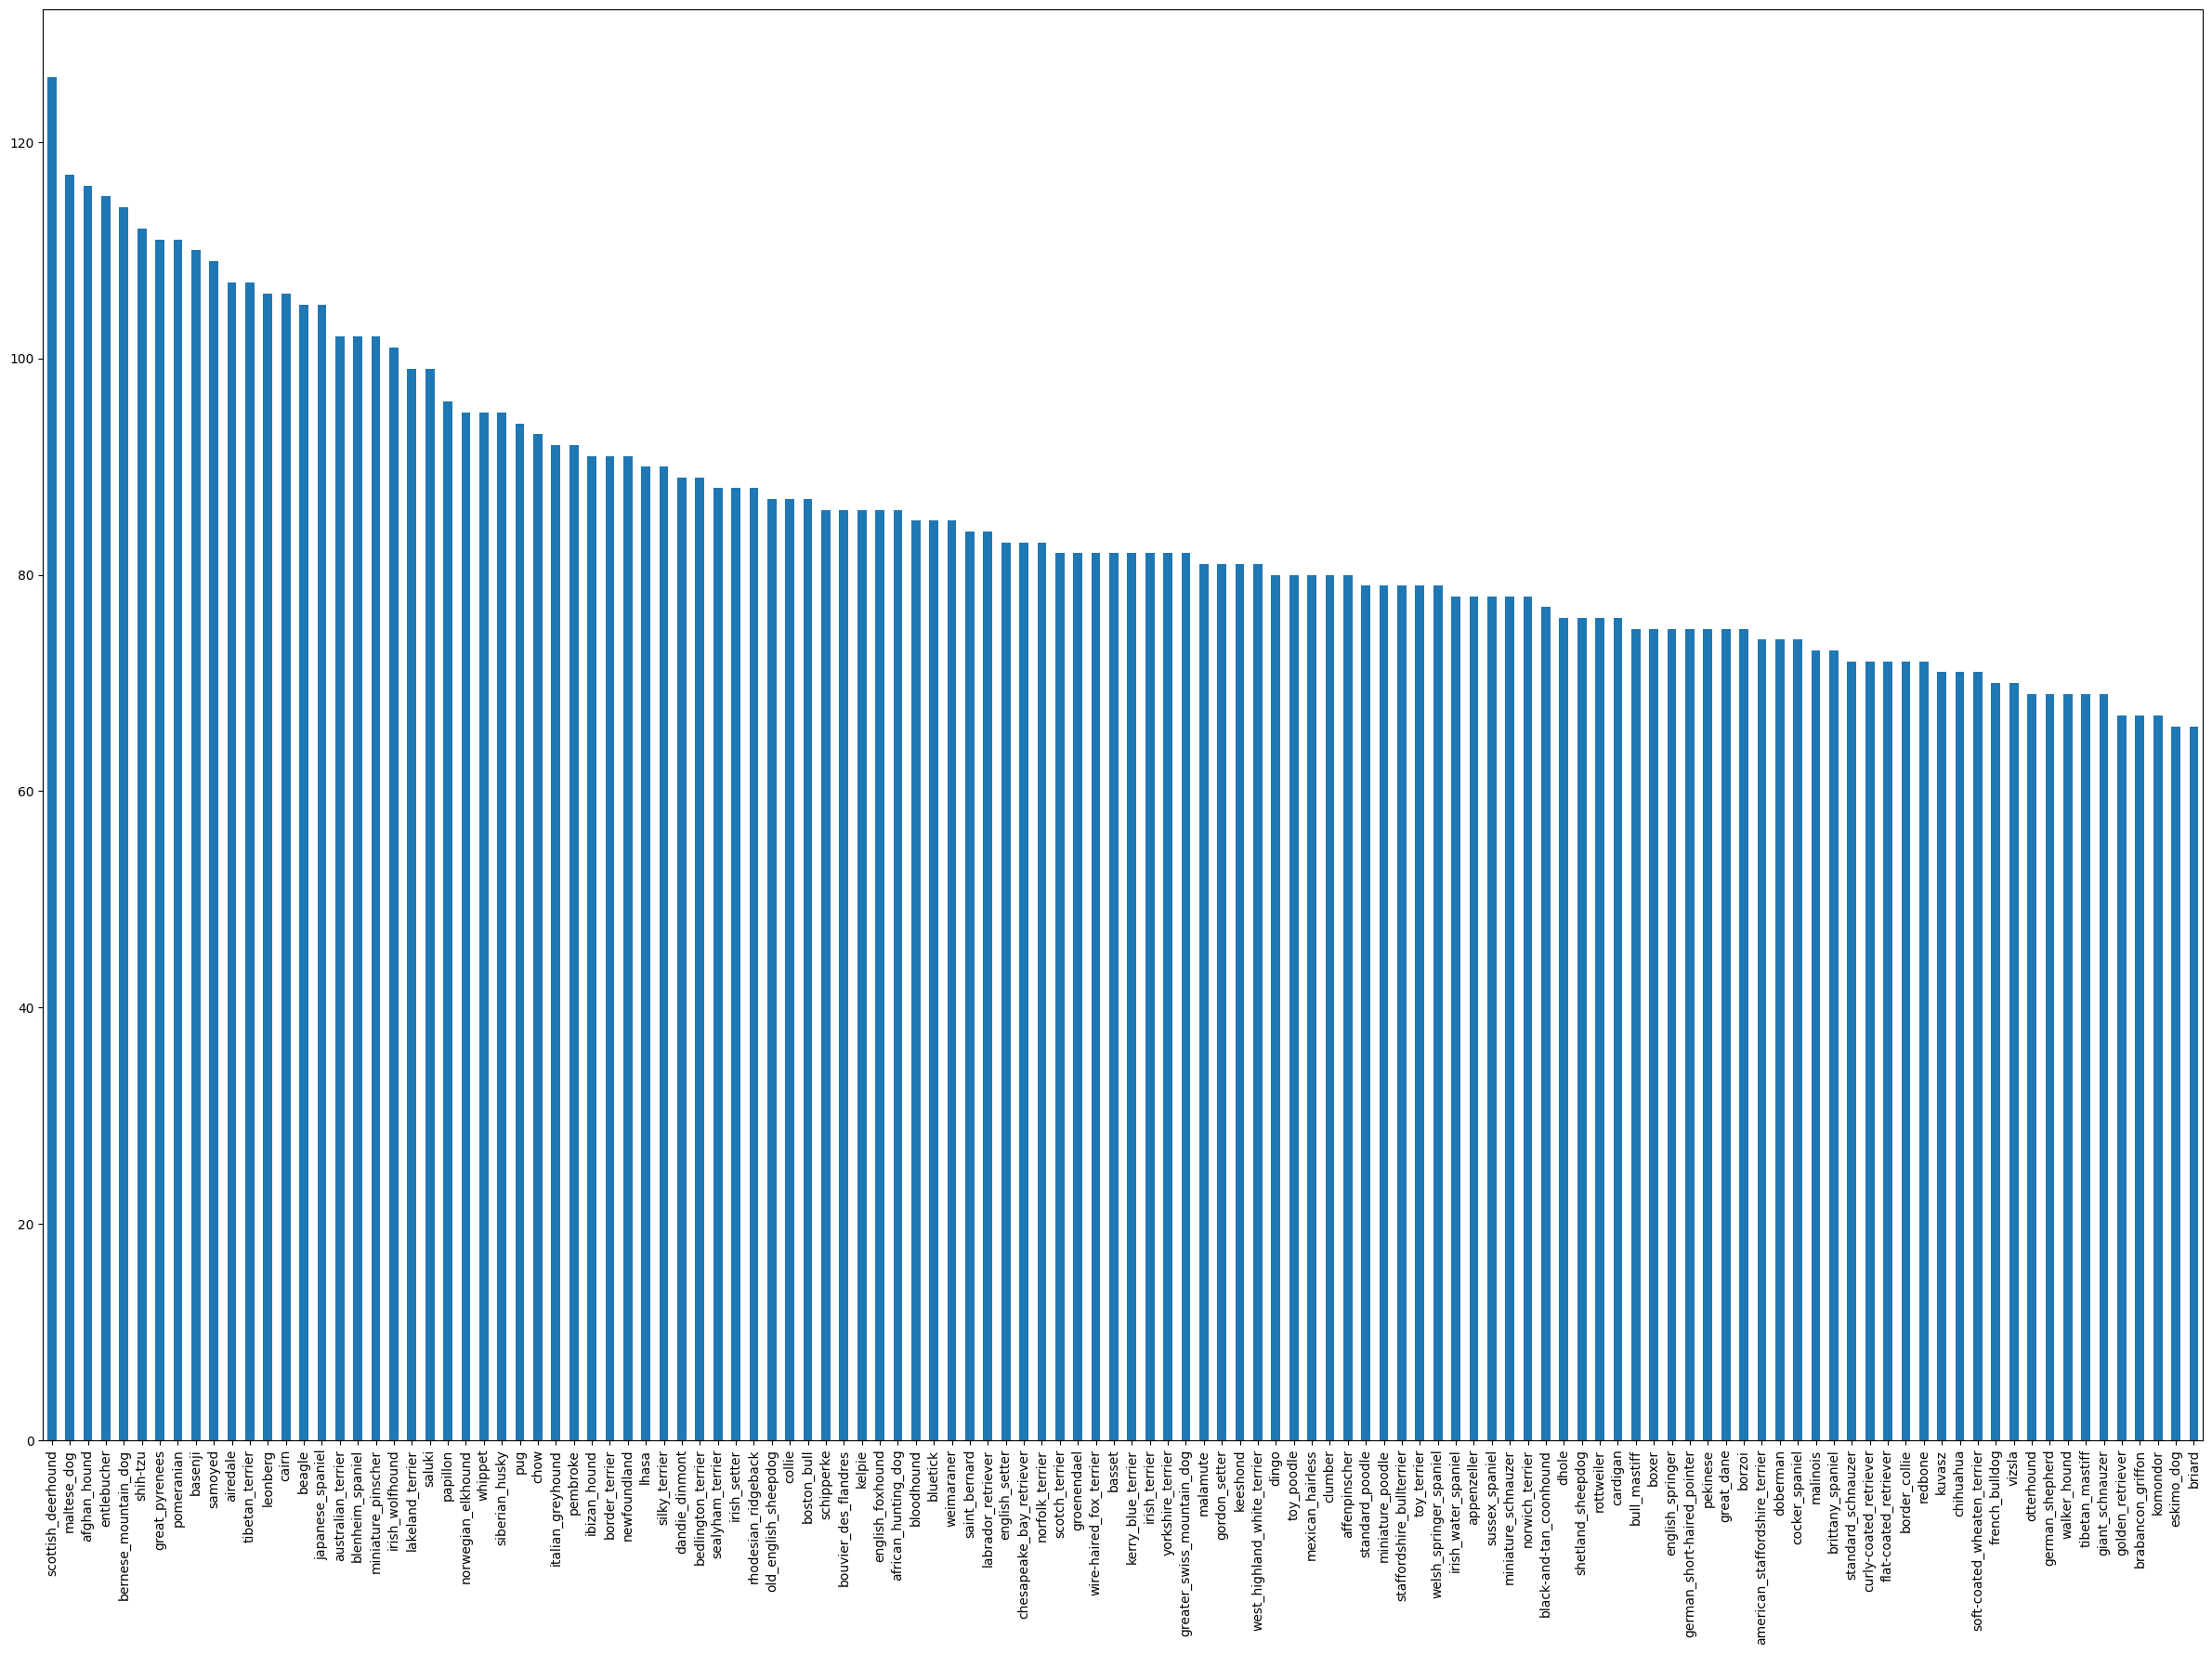

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(30,20))

In [8]:
labels_csv["breed"].value_counts().median()

82.0

PREPARING THE IMAGES

using the path of the image folder and the id it has been assigned in the csv file and the jpg extension


In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

###Getting images and their labels


In [ ]:
labels_csv.head()

In [ ]:
#create the path names from the image id

#added the string of the filepath before each id
#looping though each id using for loop

filenames= ["/content/drive/MyDrive/Dog-vision/train/"+fnames +".jpg" for fnames in labels_csv["id"]]
filenames[:10]


In [ ]:
#checking whether  the names of filenames matches actual  image files

import os
if len(os.listdir("/content/drive/MyDrive/Dog-vision/train/"))==len(filenames):
  print("number of filenames match")
else:
  print("do not match")

In [ ]:
#checkign filenames list
Image(filenames[900])




###Turning labels into  numbers

the images are in the filepath so they have to prepared as numbers



In [ ]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels

In [ ]:
len(labels)

In [ ]:
#checking for missing data by comparing the length
if len(labels)==len(filenames):
  print("the number of labels matches the filenames")
else:
  print("the labels and filenames number do not match")

In [ ]:
#find the unique labels value
unique_value=np.unique(labels)
unique_value


In [ ]:
len(unique_value)

In [ ]:
#turn the single label into an array of booleans
print(labels[0])

labels[0]==unique_value

In [ ]:
#turn every label into a boolean array
boolean_labels=[label==unique_value for label in labels]
boolean_labels


In [ ]:
len(boolean_labels)

In [ ]:
# prompt: how to convert the boolean array into integers
print(np.where(unique_value==labels[0]))#index where label occurs
print(boolean_labels[0].argmax())#index where label occurs as boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs



In [ ]:
#setting up X and y
X=filenames
y=boolean_labels

EXPERIMENTING WITH AROUNF 1000 IMAGES


In [ ]:
#Settihng the number of images to be used for experimenting
#using the feature in the colab notebook to make a slider
NUM_IMAGES=1000 #@param {type:"slider",min:100,max:1000}

In [ ]:
#split the data into train and vaidation
from sklearn.model_selection import train_test_split

#split them into training and validation set into total size NUM_IMAGES
#np.random_seed(42)
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                           y[:NUM_IMAGES],
                                           test_size=0.2,
                                           random_state=42,
                                           )

#checing the length of the split
len(X_train),len(X_val),len(y_train),len(y_val),


##TURINING IMAGES INTO TENSORS
* tensors are matrix or multi dimesional
arrays

#To preprocess the images into tensor a function is needed


1. Take image file path as imput and use tensor to read the file and save it to image variable
2. Turn images into tensors
3. resize the image to be of a particular similar shape


In [ ]:
#convert image into numpy array
#image read function
from matplotlib.pyplot import imread
#using any filename number to test the image funciton
#in the file number in each each represents a specific image in the file path
image=imread(filenames[42])
image.shape
#RGB makes each pixel

In [ ]:
image #values between 0 and 255


In [ ]:
image.max(),image.min()

In [ ]:
#convert image to tensor
tf.constant(image) #running the tensor in the GPU

#TO UNDERSTAND A FUNCTION RUN EACH LINE SEPERATELY TO UNDERSTAND

##Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Resize the image to be a shape of (224, 224)
5. Return the modified image
Before we do, let's see what importing an image looks like.

In [ ]:
# Create a function for preprocessing images
IMG_SIZE=224
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turns the image into a Tensor.
  '''
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image= tf.image.convert_image_dtype (image, tf.float32)
  #Resi the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches
Why turn our data into batches?
Let's say you're trying to process 10,000+ images in one
go... they all might not fit into memory.
So that's why we do about 32 (this is the batch size)
images at a time (you can manually adjust the batch size if
need be).
In order to use TensorFlow effectively, we need our data in
the form of Tensor tuples which look like this:
`(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  '''
  image = process_image (image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: (image, label), let's make a function to turn all of our data (x & y)
into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  '''
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
    # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
      print("Creating validation data batches...")
      data = tf.data. Dataset.from_tensor_slices ((tf.constant (X), # filepaths
                                                   tf.constant (y))) # labels

      data_batch=data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch
  else:
    print("creating training data batch")
    #tun filepaths into labels and tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    #shuffle the path names and labels before mapping image processor function is faster than shuffle
    data=data.shuffle(buffer_size=len(X))

    #create image,label tuples and which also turns the image path into preprocessed image
    data=data.map(get_image_label)

    #turn the training data into batches
    data_batch=data.batch(BATCH_SIZE)
  return data_batch



In [ ]:
#create training and validation batches
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,valid_data=True)


In [ ]:
#check the different attribute of our data batches
train_data.element_spec,val_data.element_spec
#the attribute tell about the batch dimensions, data type
#these are the images and their labels

In [ ]:
y[0]

##VISUAILIZING DATA
our data is now in batches however these need to be visuilized

In [ ]:
import matplotlib.pyplot as plt
#create function to view images in a data batch

def show_25_images(images,labels):
  '''
  diplays a plot of 25 images and their labels from a data batch
  '''
  #setting up the figure
  plt.figure(figsize=(10,10))
  #loop throgh 25 to display 25 images
  for i in range(25):
    #create the subplots 5 rows and 5 columns
    ax=plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(images[i])
    #add image label as title
    plt.title(unique_value[labels[i].argmax()])

    plt.axis("off")



In [ ]:
#the train data is in the form a batch
train_data

In [ ]:
#it will unwind the batch data and convert it into numpy iterator
#next will grab the first batch from iterator and split it
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

In [ ]:
len(train_images),len(train_labels)

In [ ]:
#visulize the images
show_25_images(train_images,train_labels)

In [ ]:
#rerunning resuls in differnt batch due to shuffling if data
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)



In [ ]:
#for validation set
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

##BUILDING A MODEL
before building model few things need to be defined:
* input shape of images in the form of tensors to the models
* the output shape ...
* the url of the model to be used
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
IMG_SIZE

In [ ]:
#set up input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] #batch, height, width, color channels
#Output shapes
OUTPUT_SHAPE=len(unique_value)

#setup model url from tensorflow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Putting the inputs, outputs and model to keras deep learning model
function to be created:
* takes the input output and model as parameter
* defines the layers in the keras model in sequential fashion(do this then that then that)
* compiles the model to be evaluated and imporoved
* building the model by telling about the input shape it will recieve
* returns the model

All these steps are here: https://www.tensorflow.org/guide/keras/overview


In [ ]:
#create function to build a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("bulding model with:",MODEL_URL)

  #Setup the model layers
  #linear stack of layers taking input and giving output
  model=tf.keras.Sequential([
     hub.KerasLayer(MODEL_URL), #layer 1 input layer, builds keras layer
     tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                           activation="softmax") #layer 2 output layer
  ])
  #compile the model
  model.compile(
      #loss function how well your model is guessing
      loss=tf.keras.losses.CategoricalCrossentropy(),
      #improve the guesses
      optimizer=tf.keras.optimizers.Adam(),#adam omptimizer
      metrics=["accuracy"]
  )
  #build the model
  model.build(INPUT_SHAPE)

  return model

  #the output of this model is a layer of 1X1X1280 layer according to the modbile net v2 architecture

In [ ]:
model=create_model()
model.summary()

#Creating callbacks
* call backs are helper function a model can use during training to do  things such as save its progress, check the progress or stop training early if a model stops improving or overfitting
* two callbakcs, one for tensor board which helps track our model progress and another for early stopping which prevents model from training too long
###Tensor board call back
1. load and setup tensor board callback
2. create a tensor board call back which is able to save logs
3. visuilize our models training with %tensorboard magic function after model training


In [ ]:
#load tensor board motebook extension into this notebook
%load_ext tensorboard


In [ ]:
import datetime

#function to build tensorboard call back
def create_tensorboard_callback():
  #create a log directory for storing tensorbaord logs
  logdir=os.path.join("/content/drive/MyDrive/Dog-vision/logs",
                      #make it so the logs get tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                      )
  return tf.keras.callbacks.TensorBoard(logdir)


####EARLY STOPPING CALL BACK
early stopping helps our model to prevent overfitting if a certain metric evaluation stops
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [ ]:
#create early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

#TRAINING A MODEL ON SUBSET OF DATA
training on 1000 images to make sure everything is working

* An **EPOCH** in machine learning means one complete pass of the training dataset through the algorithm. This epoch's number is an important hyperparameter for the algorithm. It specifies the number of epochs or complete passes of the entire training dataset passing through the training or learning process of the algorithm.

In [ ]:
NUM_EPOCHS=100 #@param {type:"slider",min:0,max:100,step:10}

In [ ]:
print("Gpu", "is available" if tf.config.list_physical_devices("GPU") else "not availaible")

creating a function that:
* creates a model using create_model()
* setup a tensor board call back using create_tensorboard_callback()
* call the fit() function passing it training data, validation data number of epochs to train for NUM_EPOCHS and the call backs to use
* return the model

In [ ]:
#create the model
def train_model():
  model=create_model()
  #create new tensorboard callback session everytime the model is traine
  tensorboard=create_tensorboard_callback()
  # fit the model to the data and passing the callback
  model.fit(x=train_data,
          epochs=NUM_EPOCHS,
          validation_data=val_data,
          validation_freq=1,
          callbacks=[tensorboard,early_stopping])
  #return the model
  return model




In [ ]:
model=train_model()
model

##Checking tensor board logs
Using the function %tensorboard will access the logs directory and visuilize the contents

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Dog-vision/logs

model's predictions are in the form of probability arrays, where each element represents the likelihood of a specific dog breed. The Softmax activation function is highlighted, as it ensures that the probability values in the output array add up to approximately one, allowing for easy interpretation.

A code snippet demonstrates how to extract information from the prediction arrays, including finding the maximum probability, calculating the sum of probabilities, determining the index of the maximum probability, and mapping it to the corresponding dog breed label. This process is applied to specific examples from the validation dataset.

The next steps involve creating a function to perform these operations on the entire validation dataset, allowing for a comprehensive evaluation. The ultimate goal is to visualize and compare the model's predictions with the true labels, providing insights into the model's performance in real-world scenarios. The tutorial emphasizes the importance of converting numeric predictions into understandable labels for analysis and interpretation.

In [ ]:
val_data

In [ ]:
predictions=model.predict(val_data, verbose=1)
predictions

In [ ]:
#First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max (predictions [index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_value[np.argmax (predictions[index])]}")

In [ ]:
unique_value[113]

Now the above funntionality needs to be done at scale and to see the image prediction being made on.
* prediction probalities are also called confidence levels

In [ ]:
#turn the probalities into their respective label which is eaier to undertand
def get_pred_labels(prediction_probalities):
  '''
  turns the array of prediction probalities into a label
  '''
  return unique_value[np.argmax(prediction_probalities)]

#get a predicted label on an array of prediction probalities
pred_labels=get_pred_labels(predictions[5])
pred_labels

In [ ]:
val_data #it is in the form of batch

In [ ]:
#creating a function to unbatch the batch dataset
def unbatchify(data):
  '''
  take a batched dataset of image and label tensors and convert them into
  sepreate arrays of image and labels
  '''
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_value[np.argmax(label)])
  return images,labels
#unbatichify the validation set
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

In [ ]:
get_pred_labels(val_images[0])

Now we've got ways to get get:
Prediction labels.
* Validation labels (truth labels)
* Validation images
Let's make some function to make these all a bit more
visaulize.
We'll create a function which:
* Takes an array of prediction probabilities, an array of
truth labels and an array of images and integers.
Convert the prediction probabilities to a predicted label.
Plot the predicted label, its predicted probability, the
truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_proababilties,labels,images,index=1):
  '''
  view the predicitons ground truth and image for a sampe index
  '''
  pred_prob,true_label,image=prediction_proababilties[index],labels[index],images[index]
  #get the pred labels
  pred_labels=get_pred_labels(pred_prob)
  #plot the images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  #chanage the color of the title according to whether the  label match or not
  if pred_labels==true_label:
    color="green"
  else:
    color="red"
  #change the plot title to be predicted label, probabilty precentage and then true label
  plt.title("{} {:2.0f}% {}".format(pred_labels,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


In [ ]:
plot_pred(predictions,
          labels=val_labels,
          images=val_images,
          index=80)

In [ ]:
plot_pred(predictions,
          labels=val_labels,
          images=val_images,
          index=69)

In [ ]:
plot_pred(predictions,
          labels=val_labels,
          images=val_images,
          index=1)

function to view the model top 10 predictions
the funciton will have:
* inout as prediction probabilities array and true arrya and integer
* find the prediction using `get_pred_labels()`
* find the top ten:
   * prediciton proablities index
   * prediction probailties values
   * prediction labels
* plot the top ten probality values and labels, colouring the true label green
  

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

In [ ]:
predictions[0].max()

In [ ]:
def plot_pred_conf(prediction_proababilties,labels,index=1):
  '''
  plus the top 10 highets predicitons along with truth labels
  for sample index
  '''
  pred_prob,true_label=prediction_proababilties[index],labels[index]
  #get the predicted labesl
  pred_labels=get_pred_labels(pred_prob)
  #find the top ten predictiion confidences index
  top_10_pred_index=pred_prob.argsort()[-10:][::-1] #reversing array
  #find the top prediciton confidence values
  top_10_pred_values=pred_prob[top_10_pred_index]
  #top 10 predicition label
  top_10_pred_labels=unique_value[top_10_pred_index]
  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange (len(top_10_pred_labels)),
              labels=top_10_pred_labels,rotation="vertical")
  #Change color of true label I
  if np.isin (true_label, top_10_pred_labels):
    top_plot[np.argmax (top_10_pred_labels == true_label)].set_color("green")
  else:
      pass


In [ ]:
plot_pred_conf(prediction_proababilties=predictions,
               labels=val_labels,
               index=10)

In [ ]:
#Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.
# Let's check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure( figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot (num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_proababilties=predictions,
            labels=val_labels,
            images=val_images,
            index=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions,
                 labels=val_labels,
                 index=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

#Saving and reloading a tained model

In [ ]:
def save_model(model,suffix=None):
  '''
  save the model in a models directory and appends a suffix (string)
  '''
  #creating a model directory with path name with current time
  modeldir=os.path.join("/content/drive/MyDrive/Dog-vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5" #save format of model
  print(f"saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  '''
  loads a saved model in the specified file path
  '''
  print(f"loading a saved model from:{model_path}")
  model=tf.keras.models.load_model(model_path,
                                  custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,suffix="1000-images-mobilenetv2-Adam")

In [ ]:
#load a trained model
loaded_1000_image_model=load_model("/content/drive/MyDrive/Dog-vision/models/20240122-13371705930649-1000-images-mobilenetv2-Adam.h5")

In [ ]:
model.evaluate(val_data)

In [ ]:
loaded_1000_image_model.evaluate(val_data)

#**Training the model on the full data**

In [ ]:
len(X),len(y)

In [ ]:
#create the data batch with full data set
full_data=create_data_batches(X,y)


In [ ]:
full_model=create_model()

In [ ]:
#create full model call backs
full_model_tensorboard=create_tensorboard_callback()
#no validation set when training on all the data so cannot monitor validaition accuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

In [ ]:
full_data

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")